In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sco
import scipy.interpolate as sci
from scipy import stats

In [4]:
data = pd.read_csv("股價.csv")

In [5]:
data.index = data['年月日'].tolist()
data.pop('年月日')

20160920    20160920
20160921    20160921
20160922    20160922
20160923    20160923
20160926    20160926
20160929    20160929
20160930    20160930
20161003    20161003
20161004    20161004
20161005    20161005
20161006    20161006
20161007    20161007
20161011    20161011
20161012    20161012
20161013    20161013
20161014    20161014
20161017    20161017
20161018    20161018
20161019    20161019
20161020    20161020
20161021    20161021
20161024    20161024
20161025    20161025
20161026    20161026
20161027    20161027
20161028    20161028
20161031    20161031
20161101    20161101
20161102    20161102
20161103    20161103
              ...   
20180810    20180810
20180813    20180813
20180814    20180814
20180815    20180815
20180816    20180816
20180817    20180817
20180820    20180820
20180821    20180821
20180822    20180822
20180823    20180823
20180824    20180824
20180827    20180827
20180828    20180828
20180829    20180829
20180830    20180830
20180831    20180831
20180903    2

In [6]:
log_returns = np.log(data / data.shift(1))

In [7]:
log_returns.head()

,1402遠東新,1413宏洲,1536和大,2013中鋼構,2330台積電,2421建準,2474可成,2882國泰金,3481群創,4739康普
20160920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20160921,0.008623,0.000000,0.006459,0.004751,0.005428,0.009298,0.007565,0.012194,0.008880,-0.002486
20160922,0.000000,0.000000,-0.013029,-0.006657,0.008116,0.011295,-0.017061,0.002690,-0.008880,-0.005741
20160923,0.004059,-0.003130,0.013029,0.001907,0.010739,0.002078,0.020821,0.001074,0.000000,0.010458
20160926,-0.002253,-0.018988,-0.013029,0.002378,-0.024283,-0.017166,-0.036230,-0.007271,-0.023059,-0.012714


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f5459c4a8>,
      dtype=object)

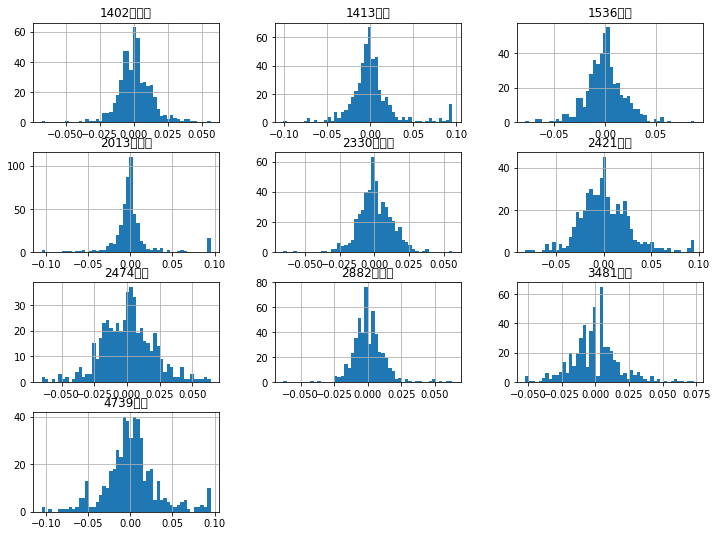

In [8]:
log_returns.hist(bins=50, figsize=(12, 9))

In [9]:
rets = log_returns
year_ret = rets.mean() * 252
year_volatility = rets.cov() * 252

In [10]:
year_ret

1402遠東新    0.250281
1413宏洲     0.348281
1536和大    -0.025670
2013中鋼構    0.227148
2330台積電    0.214572
2421建準     0.294508
2474可成     0.158352
2882國泰金    0.180362
3481群創     0.010529
4739康普     0.377503
dtype: float64

In [11]:
year_volatility

,1402遠東新,1413宏洲,1536和大,2013中鋼構,2330台積電,2421建準,2474可成,2882國泰金,3481群創,4739康普
1402遠東新,0.039721,0.015437,0.006067,0.007438,0.014136,0.010980,0.016198,0.010675,0.017270,0.010427
1413宏洲,0.015437,0.181355,0.008693,0.028084,0.010635,0.009686,0.012917,0.008258,0.012166,0.010352
1536和大,0.006067,0.008693,0.096802,0.005916,0.011251,0.013801,0.021494,0.008011,0.016465,0.052454
2013中鋼構,0.007438,0.028084,0.005916,0.145148,0.006042,-0.000476,0.011232,0.009563,0.010490,0.010749
2330台積電,0.014136,0.010635,0.011251,0.006042,0.039261,0.010846,0.020410,0.015141,0.014564,0.016497
2421建準,0.010980,0.009686,0.013801,-0.000476,0.010846,0.182073,0.024542,0.008616,0.023061,0.044391
2474可成,0.016198,0.012917,0.021494,0.011232,0.020410,0.024542,0.101515,0.015413,0.017686,0.031436
2882國泰金,0.010675,0.008258,0.008011,0.009563,0.015141,0.008616,0.015413,0.035931,0.012889,0.013051
3481群創,0.017270,0.012166,0.016465,0.010490,0.014564,0.023061,0.017686,0.012889,0.084473,0.021666
4739康普,0.010427,0.010352,0.052454,0.010749,0.016497,0.044391,0.031436,0.013051,0.021666,0.256335


In [12]:
number_of_assets = 10
weights = np.random.random(number_of_assets)
weights /= np.sum(weights)

In [13]:
portfolio_returns = []
portfolio_volatilities = []
for p in range (5000):
      weights = np.random.random(number_of_assets)
      weights /= np.sum(weights)
      portfolio_returns.append(np.sum(rets.mean() * weights) * 252)
      portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

In [14]:
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

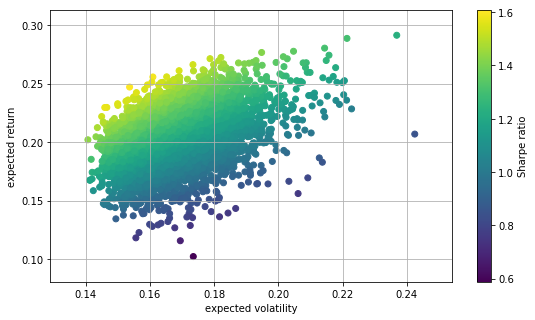

In [15]:
plt.figure(figsize=(9, 5))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns / portfolio_volatilities, marker='o') #画散点图
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [16]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [17]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [18]:
bnds = tuple((0, 1) for x in range(number_of_assets))
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
opts = sco.minimize(min_func_sharpe, number_of_assets * [1. / number_of_assets,], method='SLSQP',  bounds=bnds, constraints=cons)

In [19]:
opts['x'].round(3)

array([0.331, 0.096, 0.   , 0.073, 0.194, 0.076, 0.   , 0.159, 0.   ,
       0.071])

In [20]:
statistics(opts['x']).round(4) #紅星(Q點)

array([0.2523, 0.1461, 1.7265])

In [21]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [22]:
optv = sco.minimize(min_func_variance, number_of_assets * [1. / number_of_assets,], method='SLSQP', bounds=bnds, constraints=cons)

In [23]:
def min_func_port(weights):
    return statistics(weights)[1]

In [24]:
target_returns = np.linspace(0.35, 0.65, 30)

In [25]:
target_volatilities = []

In [26]:
for tret in target_returns:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret}, {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, number_of_assets * [1. / number_of_assets,], method='SLSQP', bounds=bnds, constraints=cons)
    target_volatilities.append(res['fun'])

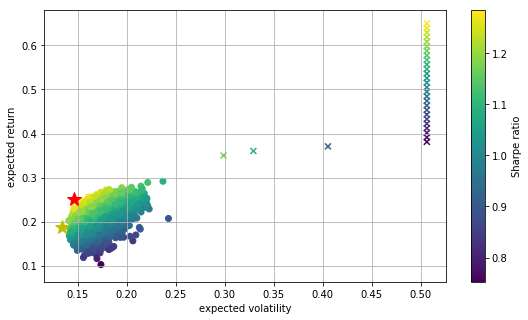

In [27]:
plt.figure(figsize=(9, 5))
plt.scatter(portfolio_volatilities, portfolio_returns, c=portfolio_returns / portfolio_volatilities, marker='o')
plt.scatter(target_volatilities, target_returns, c=target_returns / target_volatilities, marker='x')
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize=15.0)
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize=15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [28]:
statistics(optv['x']).round(4) #黃星(C點)

array([0.1884, 0.1341, 1.4046])

In [29]:
ind = np.argmin(target_volatilities)

In [30]:
upper_half_volatilities = target_volatilities[ind:]
upper_half_returns = target_returns[ind:]

In [31]:
tck = sci.splrep(upper_half_volatilities, upper_half_returns)
def f(x):
    return sci.splev(x, tck, der=0)

ValueError: Error on input data